# Image Pre Processing

## Image -> Resize -> Grayscale -> Thresh Binary

In [8]:
import os
import cv2
import numpy as np
from skimage import feature
import matplotlib.pyplot as plt

In [2]:
!ls

Untitled.ipynb


In [3]:
os.chdir('..')

In [4]:
!ls

100_spiral_model.h5            cascade.xml
After_Preprocessing            models
Cascade_Integration.ipynb      spiral
Exception_Handing.ipynb        spiral_basic_model.ipynb
FINAL_MODEL.ipynb              spiral_data
Graphs                         spiral_final_model.ipynb
Original_data                  spiral_healthy_augumentor.py
SPIRAL_MODEL.ipynb             spiral_parkinson_augumentor.py
Testing_01.ipynb               wave
Trainer_Spiral.ipynb           wave_basic_model.ipynb
Untitled.ipynb                 wave_healthy_augumentor.py
Wave_Final_Model.ipynb         wave_parkinson_augumentor.py


In [6]:
def quantify_image(image):
    features = feature.hog(image, orientations=9,
                           pixels_per_cell=(10, 10), cells_per_block=(2, 2),
                           transform_sqrt=True, block_norm="L1")
    return features

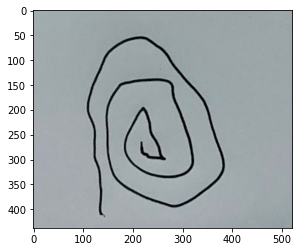

In [15]:
image = cv2.imread('/Users/mahimairaja/Desktop/h.png')
plt.imshow(image)

In [16]:

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (200, 200))
        # threshold the image such that the drawing appears as white
        # on a black background
image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        # quantify the image
features = quantify_image(image)
        # update the data and labels lists, respectively
# plt.imshow(features)

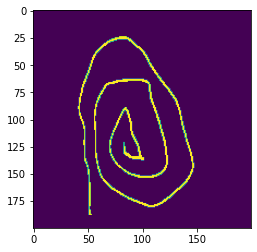

In [18]:
plt.imshow(image)



In [23]:
print(len(features))
print(type(features))

12996
<class 'numpy.ndarray'>


---

In [25]:
cur_dir = os.getcwd()

base_dir = os.path.join(cur_dir, 'spiral_processed')
# os.mkdir(base_dir) #make base directory

In [26]:
! ls

100_spiral_model.h5            models
After_Preprocessing            spiral
Cascade_Integration.ipynb      spiral_basic_model.ipynb
Exception_Handing.ipynb        spiral_data
FINAL_MODEL.ipynb              spiral_final_model.ipynb
Graphs                         spiral_healthy_augumentor.py
Original_data                  spiral_parkinson_augumentor.py
SPIRAL_MODEL.ipynb             spiral_processed
Testing_01.ipynb               wave
Trainer_Spiral.ipynb           wave_basic_model.ipynb
Untitled.ipynb                 wave_healthy_augumentor.py
Wave_Final_Model.ipynb         wave_parkinson_augumentor.py
cascade.xml


In [27]:
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir) 

validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

train_h_dir = os.path.join(train_dir, 'healthy')
# os.mkdir(train_h_dir)

train_p_dir = os.path.join(train_dir, 'parkinson')
# os.mkdir(train_p_dir)

validation_h_dir = os.path.join(validation_dir, 'healthy')
# os.mkdir(validation_h_dir)

validation_p_dir = os.path.join(validation_dir, 'parkinson')
# os.mkdir(validation_p_dir)

test_h_dir = os.path.join(test_dir, 'healthy')
# os.mkdir(test_h_dir)

test_p_dir = os.path.join(test_dir, 'parkinson')
# os.mkdir(test_p_dir)

/Users/mahimairaja/DESKT/Desktop/GAIP-Learnings/GIT/Projects/Parkinson_Detection/Hand_drawings/spiral/healthy


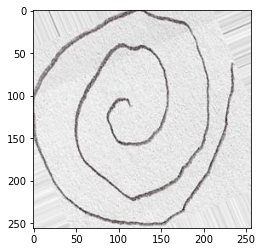

In [43]:
img_path = os.path.join(cur_dir,'spiral/healthy')

print(img_path)
img_list = os.listdir(img_path)
original_dataset_dir = os.path.join(cur_dir, img_path)

# Healthy training dataset
for images in img_list[0:1000]:
    src = os.path.join(original_dataset_dir, images)
    src = cv2.imread(src)
    plt.imshow(src)
    break


In [46]:
img_path = os.path.join(cur_dir,'spiral/healthy')
img_list = os.listdir(img_path)
original_dataset_dir = os.path.join(cur_dir, img_path)

# Healthy training dataset
for images in img_list[0:1000]:
    src = os.path.join(original_dataset_dir, images)
    src = cv2.imread(src)
    image = cv2.resize(src, (128, 128))
        # pre-process the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (200, 200))
    img = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    dst = os.path.join(train_h_dir, images)
    cv2.imwrite(dst, img)


# Healthy training dataset
for images in img_list[1000:1500]:
    src = os.path.join(original_dataset_dir, images)
    src = cv2.imread(src)
    image = cv2.resize(src, (128, 128))
        # pre-process the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (200, 200))
    img = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    
    
    dst = os.path.join(test_h_dir, images)
    cv2.imwrite(dst, img)

    
# Healthy training dataset
for images in img_list[1500:2000]:
    src = os.path.join(original_dataset_dir, images)
    src = cv2.imread(src)
    image = cv2.resize(src, (128, 128))
        # pre-process the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (200, 200))
    img = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    
    
    dst = os.path.join(validation_h_dir, images)
    cv2.imwrite(dst, img)

    

In [47]:
img_path = os.path.join(cur_dir,'spiral/parkinson/')
img_list = os.listdir(img_path)
original_dataset_dir = os.path.join(cur_dir, img_path)


# Parkinson training dataset
for images in img_list[0:1000]:
    src = os.path.join(original_dataset_dir, images)
    
    src = cv2.imread(src)
    image = cv2.resize(src, (128, 128))
        # pre-process the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (200, 200))
    img = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    
    dst = os.path.join(train_p_dir, images)
    cv2.imwrite(dst, img)
    

# Parkinson training dataset
for images in img_list[1000:1500]:
    src = os.path.join(original_dataset_dir, images)
    
    src = cv2.imread(src)
    image = cv2.resize(src, (128, 128))
        # pre-process the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (200, 200))
    img = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    
    dst = os.path.join(test_p_dir, images)
    cv2.imwrite(dst, img)



# Parkinson training dataset
for images in img_list[1500:2000]:
    src = os.path.join(original_dataset_dir, images)
    
    src = cv2.imread(src)
    image = cv2.resize(src, (128, 128))
        # pre-process the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (200, 200))
    img = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    
    dst = os.path.join(validation_p_dir, images)
    cv2.imwrite(dst, img)
    